[first data from](https://www.kaggle.com/balaka18/email-spam-classification-dataset-csv)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import csv

2) чистка и нормализация входных данных, удаляем 1 строку и 1 столбец, приводим в нормализованный вид

In [4]:
file = open("emails.csv", 'r')
reader = csv.reader(file)

unprepared_data = []
for i in reader:
    unprepared_data.append(i)
unprepared_data = unprepared_data[1:]
for i in unprepared_data:
    del i[0]

file.close()

data = []
for i in unprepared_data:
    data.append([int(x) for x in i])

x = [i[:-1] for i in data]
y = [i[-1] for i in data]

x = normalize(x, axis = 0)

3) визуализация набора данных с использованием методов снижения размерности, 1 метод - мотод главных компонент 

In [8]:
def plot_PCA(data):
    
    pca=PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    fig, ax = plt.subplots()
    ax.scatter(reduced_data[:, 0], reduced_data[:, 1],
               cmap=plt.cm.autumn, edgecolor='r')
    ax.set_title("PCA plot 2D")
    
    plt.show()    

In [9]:
def plot_TSNE(data):
    tsne=TSNE()
    reduced_data = tsne.fit_transform(data)

    fig, ax = plt.subplots()
    ax.scatter(reduced_data[:, 0], reduced_data[:, 1], 
               cmap=plt.cm.autumn, edgecolor='r')
    ax.set_title("TSNE plot")
    
    plt.show()

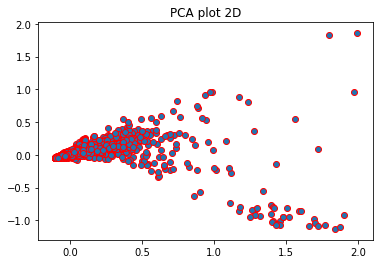

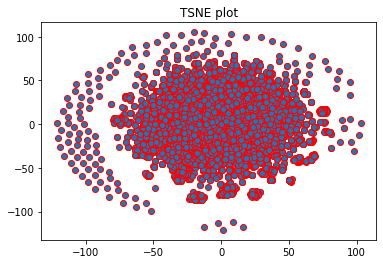

In [10]:
plot_PCA(x)
plot_TSNE(x)

1) построить нейронную сеть и обучить ее

Все сделано с перцептроном, у которого внутренние слои 64 и 64

In [17]:
def train_MLPC(layers, x = x, y = y):
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)
        
    model = MLPClassifier(layers, activation='tanh')
    model.fit(train_x, train_y)

    y_hat = model.predict(test_x)

    return accuracy_score([[j] for j in test_y], y_hat)

In [18]:
%%time
accuracy = [train_MLPC((64, 64))]
print(accuracy[0])

MemoryError: 

4) поэкспериментировать с несколькими структурами нейросети

Попробуем задать другие внутренние слои и посмотрим каким станет коэффициент

In [ ]:
%%time
accuracy.append(train_MLPC((16, 16)))
accuracy.append(train_MLPC((32, 32, 32)))
accuracy.append(train_MLPC((128, 128, 128, 1228)))
accuracy.append(train_MLPC((256)))
accuracy.append(train_MLPC((256, 128)))
accuracy.append(train_MLPC((256, 128, 64)))
accuracy.append(train_MLPC((256, 128, 256)))

for i in accuracy:
    print(i)

print("max accuracy : ", max(accuracy))